In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Data

In [3]:
X_test = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/single_turbine_data_notemp/X_test.csv', sep=',', index_col=0)
X_train = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/single_turbine_data_notemp/X_train.csv', sep=',', index_col=0)
y_test = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/single_turbine_data_notemp/y_test.csv', sep=',', index_col=0)
y_train = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/single_turbine_data_notemp/y_train.csv', sep=',', index_col=0)

In [4]:
target = '1_Gear oil temperature (°C)'

In [5]:
dfe = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/ERA5T_52.50N_-1.00E_100m_1hr_time-series.csv', index_col=0, parse_dates=True)

La ligne dfe.index = dfe.index.tz_localize(None) peut être divisée en deux parties :

dfe.index.tz_localize(None): Cette partie du code utilise l'attribut index d'une DataFrame (ou d'une Series) dfe pour effectuer une opération appelée tz_localize(None). Cette opération est utilisée pour supprimer l'information sur le fuseau horaire (timezone) de l'index des données. Les données temporelles peuvent souvent avoir des informations de fuseau horaire associées à elles, mais parfois, pour des raisons de traitement ou d'analyse, on peut vouloir supprimer cette information.

dfe.index = ...: Cette partie du code prend le résultat de l'opération tz_localize(None) et le réaffecte à l'index de la DataFrame dfe. Cela signifie que l'index de la DataFrame dfe est modifié pour refléter les valeurs après avoir supprimé l'information sur le fuseau horaire.

In [8]:
dfe.index = dfe.index.tz_localize(None)

dfe.resample('10min') :

La méthode resample est utilisée pour rééchantillonner les données temporelles selon une nouvelle fréquence spécifiée, dans ce cas, '10min', ce qui signifie un échantillonnage toutes les 10 minutes. Cela suppose que les données de la DataFrame sont temporelles et qu'elles ont un index de type temporel (pandas.DatetimeIndex).
interpolate() :

Après le rééchantillonnage, la méthode interpolate() est utilisée pour remplir les valeurs manquantes ou NaN (Not a Number) en interpolant les valeurs entre les points de données connus. L'interpolation est le processus de remplissage des valeurs manquantes en estimant les valeurs intermédiaires à partir des valeurs connues.

In [9]:
dfe = dfe.resample('10min').interpolate()

In [10]:
dfe.head(2)

,10_m_hws_mean_mps,10_m_hwd_mean_deg-n_true,100_m_hws_mean_mps,100_m_hwd_mean_deg-n_true,2_m_temp_mean_deg-c,2_m_dew_point_temp_deg-c,2_m_rh_mean_%,0_m_pres_mean_pa,sea_level_pres_mean_pa,boundary_layer_height_m,total_cloud_cover_%,instantaneous_surface_sensible_heat_flux_wpm2,friction_velocity_mps,cloud_base_height_m,surface_solar_radiation_downwards_wpm2,era5t
datetime_start_utc,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,4.430000,248.000000,8.440000,252.500000,3.000000,1.50,89.400000,100432.700000,101892.2,432.400000,0.0,42.3600,0.290992,NaN,0.0,0.0
2016-01-01 00:10:00,4.298333,247.383333,8.303333,252.133333,2.933333,1.45,89.566667,100447.566667,101907.4,412.416667,0.0,41.2075,0.284364,NaN,0.0,0.0


### Data Test Merge

In [6]:
df_test = pd.merge(X_test, y_test, on='# Date and time', how='inner')
df_test.head(2)

,1_Wind speed (m/s),1_Wind direction (°),1_Nacelle position (°),1_Power (kW),1_Reactive power (kvar),1_Voltage L1 / U (V),1_Voltage L2 / V (V),1_Voltage L3 / W (V),1_Current L1 / U (A),1_Current L2 / V (A),1_Current L3 / W (A),1_Rotor speed (RPM),1_Generator RPM (RPM),1_Gearbox speed (RPM),1_Blade angle (pitch position) A (°),1_Blade angle (pitch position) B (°),1_Blade angle (pitch position) C (°),1_Yaw bearing angle (°),1_Apparent power (kVA),1_Gear oil temperature (°C)
# Date and time,,,,,,,,,,,,,,,,,,,,
2019-06-17 08:20:00,8.137491,199.697802,206.902130,1103.650946,-363.694891,401.812302,401.804103,402.141501,935.335498,940.200745,931.779749,14.420822,1706.515789,1712.550264,0.0,0.0,0.0,206.902130,1161.755676,52.8625
2019-06-17 08:30:00,8.095169,207.653847,209.532183,1170.524026,-413.307637,399.883200,399.929948,400.089203,1029.369005,1035.589507,1026.319749,14.155849,1674.856951,1680.586149,0.0,0.0,0.0,209.525188,1248.648996,52.2425


### Data Train Merge

In [7]:
df_train = pd.merge(X_train, y_train, on='# Date and time', how='inner')
df_train.head(2)

,1_Wind speed (m/s),1_Wind direction (°),1_Nacelle position (°),1_Power (kW),1_Reactive power (kvar),1_Voltage L1 / U (V),1_Voltage L2 / V (V),1_Voltage L3 / W (V),1_Current L1 / U (A),1_Current L2 / V (A),1_Current L3 / W (A),1_Rotor speed (RPM),1_Generator RPM (RPM),1_Gearbox speed (RPM),1_Blade angle (pitch position) A (°),1_Blade angle (pitch position) B (°),1_Blade angle (pitch position) C (°),1_Yaw bearing angle (°),1_Apparent power (kVA),1_Gear oil temperature (°C)
# Date and time,,,,,,,,,,,,,,,,,,,,
2016-05-03 09:40:00,4.728757,276.818054,268.365997,353.803345,-167.806335,403.092010,403.543335,403.127014,328.994995,341.654999,332.929993,10.424160,1238.723389,1241.053345,0.000000,0.000000,0.000000,268.365997,399.346008,58.75
2016-05-03 09:50:00,6.427782,275.881958,268.365997,515.468567,-185.731003,403.238098,403.334290,403.119904,462.379486,469.053986,462.838013,11.664658,1383.924805,1387.244751,0.098996,0.099996,0.099996,268.365997,557.094421,59.27


### BASIC STATS 

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
1_Wind speed (m/s),158731.0,6.190610,2.676158,0.110653,4.280668,5.988556,7.788085,24.376621
1_Wind direction (°),158731.0,203.206531,92.362138,0.003519,144.544434,223.053421,267.161362,359.998779
1_Nacelle position (°),158731.0,202.777021,92.586422,0.011559,143.244003,222.871735,267.228119,359.982971
1_Power (kW),158731.0,604.836196,597.372288,-16.652830,125.539639,396.225006,924.432253,2081.028912
1_Reactive power (kvar),158731.0,-197.774360,157.671499,-634.010132,-290.046753,-151.114944,-74.645901,3.794986
1_Voltage L1 / U (V),158731.0,401.875147,3.132856,0.000000,400.482330,401.921082,403.355362,410.526894
1_Voltage L2 / V (V),158731.0,402.618716,3.190587,0.000000,401.156998,402.673553,404.147446,410.981423
1_Voltage L3 / W (V),158730.0,402.699797,3.132324,0.000000,401.293585,402.749573,404.182228,411.285214
1_Current L1 / U (A),158730.0,536.320841,508.440087,2.942500,129.480629,356.346069,807.486755,1808.010986
1_Current L2 / V (A),158730.0,542.635081,509.104308,0.000000,137.643745,365.908005,813.055618,1813.315063


In [12]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
1_Wind speed (m/s),52206.0,6.380529,2.926871,0.134232,4.270729,6.072543,8.056127,22.419562
1_Wind direction (°),52206.0,195.298746,90.432399,0.007310,130.991592,215.882760,256.694115,359.996088
1_Nacelle position (°),52206.0,195.322123,90.582304,0.029888,131.608982,215.683182,257.390106,359.944001
1_Power (kW),52206.0,680.686166,660.450066,-17.846463,133.108273,445.387698,1088.858338,2077.179653
1_Reactive power (kvar),52206.0,-214.578087,173.730023,-616.421777,-326.290844,-161.521670,-75.484938,2.388081
1_Voltage L1 / U (V),52206.0,402.466361,3.017233,0.000000,401.069414,402.513475,403.933696,408.601144
1_Voltage L2 / V (V),52206.0,402.897880,3.132716,0.000000,401.369388,402.951974,404.503021,410.065695
1_Voltage L3 / W (V),52206.0,402.998753,2.983798,0.000000,401.617340,403.039588,404.445553,409.301401
1_Current L1 / U (A),52206.0,599.413306,562.576691,3.150000,134.858245,395.377998,947.332745,1806.245251
1_Current L2 / V (A),52206.0,605.317803,563.495527,0.192500,142.439375,404.180905,953.652694,1810.519507


### Time Span

In [13]:
# Convertir l'index en format de date 
df_train.index = pd.to_datetime(df_train.index)

# Calculer la date minimale, la date maximale et la différence en années
min_date = df_train.index.min()
max_date = df_train.index.max()

# Calculer la différence en jours
difference_days = (max_date - min_date).days

# Calculer la différence en années en divisant le nombre de jours par la moyenne des jours dans une année
nombre_moyen_jours_annee = 365.25  # Prendre en compte les années bissextiles
difference_years = difference_days / nombre_moyen_jours_annee

print("Date minimale :", min_date)
print("Date maximale :", max_date)
print("Différence en années :", difference_years)

Date minimale : 2016-05-03 09:40:00
Date maximale : 2019-06-17 08:10:00
Différence en années : 3.1184120465434635


### Missing Data

In [14]:
df_train.isna().sum(1).value_counts()

0    158705
1        25
4         1
dtype: int64

In [15]:
df_test.isna().sum(1).value_counts()

0    52206
dtype: int64

In [16]:
X_train.isna().sum()[X_train.isna().sum() > 0]

1_Voltage L3 / W (V)     1
1_Current L1 / U (A)     1
1_Current L2 / V (A)     1
1_Current L3 / W (A)     1
1_Rotor speed (RPM)     25
dtype: int64

In [17]:
df_train.isna().sum()[df_train.isna().sum() > 0]

1_Voltage L3 / W (V)     1
1_Current L1 / U (A)     1
1_Current L2 / V (A)     1
1_Current L3 / W (A)     1
1_Rotor speed (RPM)     25
dtype: int64

In [18]:
np.unique(df_train[df_train.isna().sum(1) > 0].index.date)

array([datetime.date(2016, 11, 1), datetime.date(2016, 11, 2),
       datetime.date(2017, 1, 18), datetime.date(2017, 1, 19),
       datetime.date(2019, 5, 3)], dtype=object)

### Target Distribution

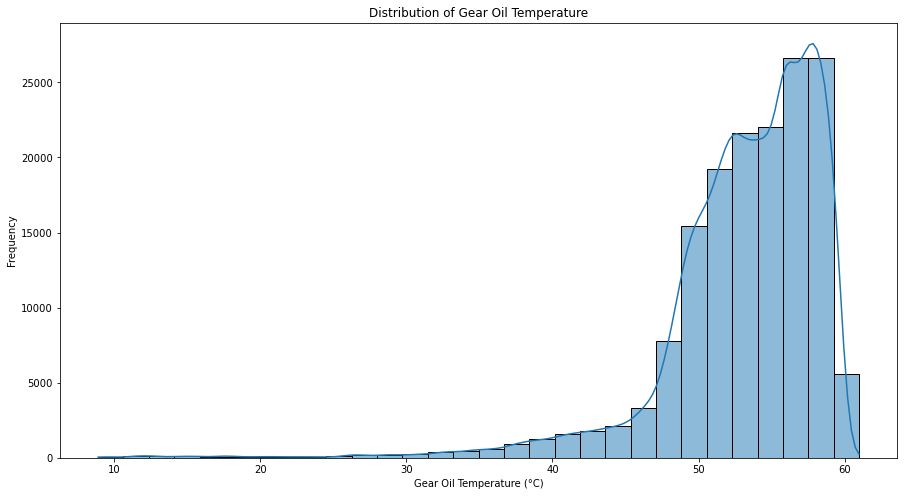

In [19]:
plt.figure(figsize=(15, 8))
sns.histplot(df_train['1_Gear oil temperature (°C)'], bins=30, kde=True)
plt.title('Distribution of Gear Oil Temperature')
plt.xlabel('Gear Oil Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

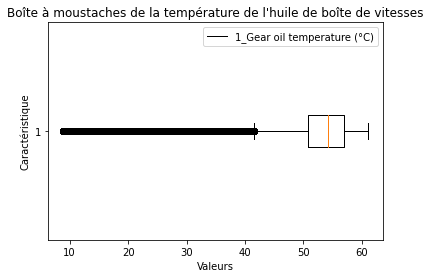

In [20]:
import matplotlib.pyplot as plt

# Créez un boîte à moustaches avec les données de df_train['1_Gear oil temperature (°C)']
plt.boxplot(df_train['1_Gear oil temperature (°C)'], vert=False)

# Ajoutez une légende
plt.xlabel('Valeurs')
plt.ylabel('Caractéristique')
plt.title('Boîte à moustaches de la température de l\'huile de boîte de vitesses')
plt.legend(['1_Gear oil temperature (°C)'])  # Ajoutez ici le nom de votre caractéristique

# Affichez le graphique
plt.show()


### Linear Correlations

In [21]:
corr = df_train.corr()[target].sort_values(ascending=True)[:-1]

<AxesSubplot:>

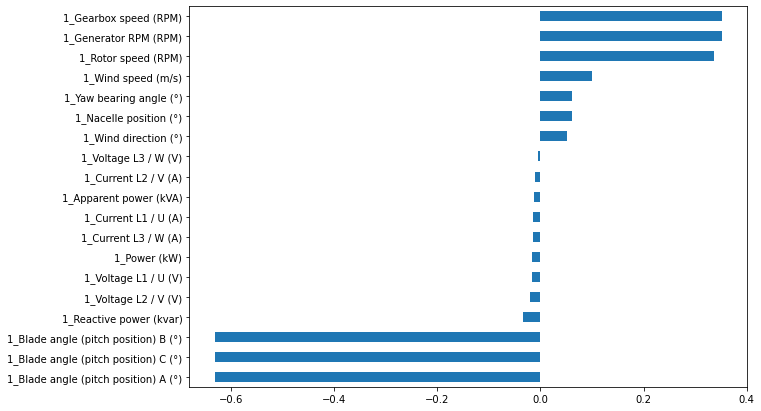

In [22]:
plt.figure(figsize=(10, 7))
corr.plot(kind='barh')

In [23]:
X_train.columns

Index(['1_Wind speed (m/s)', '1_Wind direction (°)', '1_Nacelle position (°)',
       '1_Power (kW)', '1_Reactive power (kvar)', '1_Voltage L1 / U (V)',
       '1_Voltage L2 / V (V)', '1_Voltage L3 / W (V)', '1_Current L1 / U (A)',
       '1_Current L2 / V (A)', '1_Current L3 / W (A)', '1_Rotor speed (RPM)',
       '1_Generator RPM (RPM)', '1_Gearbox speed (RPM)',
       '1_Blade angle (pitch position) A (°)',
       '1_Blade angle (pitch position) B (°)',
       '1_Blade angle (pitch position) C (°)', '1_Yaw bearing angle (°)',
       '1_Apparent power (kVA)'],
      dtype='object')

In [24]:
features = ['1_Wind speed (m/s)', '1_Wind direction (°)', '1_Nacelle position (°)',
       '1_Power (kW)', '1_Reactive power (kvar)', '1_Voltage L1 / U (V)',
       '1_Voltage L2 / V (V)', '1_Voltage L3 / W (V)', '1_Current L1 / U (A)',
       '1_Current L2 / V (A)', '1_Current L3 / W (A)', '1_Rotor speed (RPM)',
       '1_Generator RPM (RPM)', '1_Gearbox speed (RPM)',
       '1_Blade angle (pitch position) A (°)',
       '1_Blade angle (pitch position) B (°)',
       '1_Blade angle (pitch position) C (°)', '1_Yaw bearing angle (°)',
       '1_Apparent power (kVA)']

In [25]:
len(features)

19

##### Remplir les données manquantes

In [26]:
for col in X_train.columns:
    X_train[col] = X_train[col].fillna(method='ffill')

In [ ]:
for col in y_train.columns:
    y_train[col] = y_train[col].fillna(method='ffill')

##### Etude des variables importantes

In [27]:
with open('models/first_model_nodata_temp.pkl', 'rb') as fp:
    model = pickle.load(fp)

In [28]:
features = list(df_train.columns[:-1])

<AxesSubplot:title={'center':'Importance des caractéristiques'}, xlabel='Importance', ylabel='Caractéristiques'>

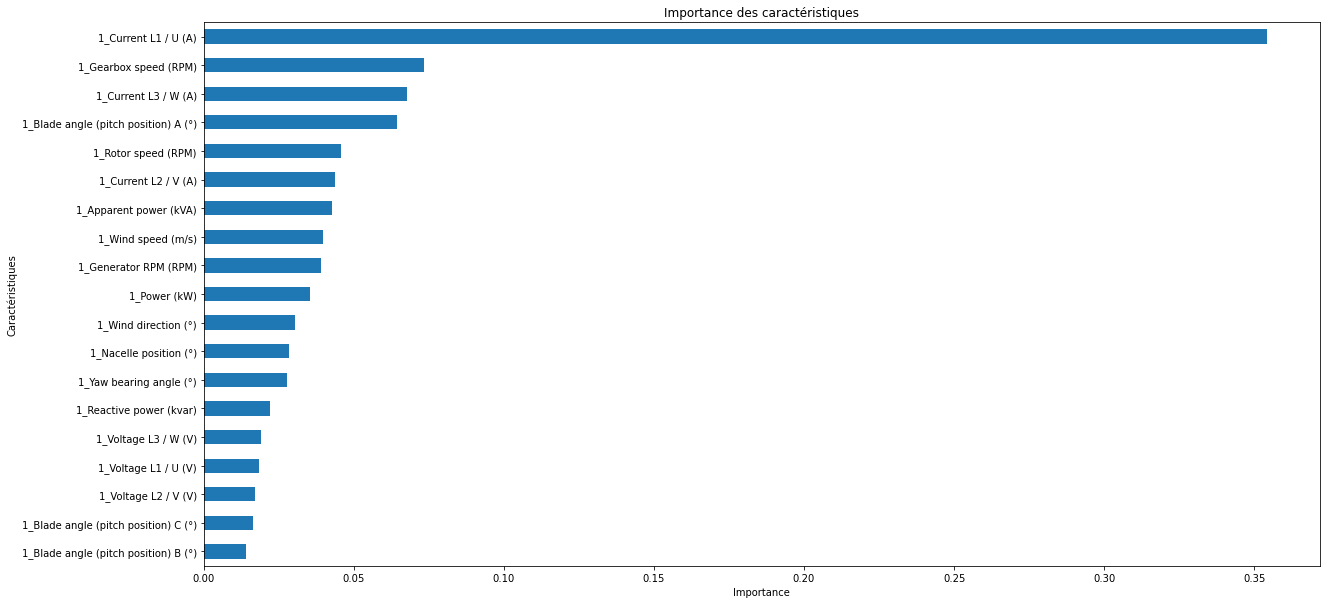

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('Importance')
ax.set_ylabel('Caractéristiques')
ax.set_title('Importance des caractéristiques')
pd.Series(index=features, data=model.feature_importances_).sort_values().plot(kind='barh', ax=ax)

### External data

In [ ]:
dfe = dfe.resample('10min').interpolate()

In [31]:
dfe.to_csv("dfe.csv")
df_train.to_csv("df_train.csv")
df_test.to_csv("df_test.csv")